<a href="https://colab.research.google.com/github/kargaranamir/Z3prover-walkthrough/blob/main/Z3prover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Z3prover
Sources:
- Open Source Code: https://github.com/Z3Prover/z3
- Data Structures in Python: https://z3prover.github.io/api/html/namespacez3py.html
- Python Package: https://pypi.org/project/z3-solver/
- Python Examples (1): https://github.com/Z3Prover/z3/tree/master/examples/python
- Python Examples (2): https://www.csa.iisc.ac.in/~deepakd/logic-2021/
- Tutorial in Python (1): https://ericpony.github.io/z3py-tutorial/guide-examples.htm
- Tutorial in Python (2): https://github.com/philzook58/z3_tutorial

### Install Python Package




In [2]:
!pip install z3-solver

     |████████████████████████████████| 33.0 MB 55.9 MB/s 


### Import Library

In [3]:
from z3 import *

### Example 1 (Solve)
- check satisfiability of this statement: (x + y < 1) ∧ (0 < x) ∧ (0 < y)
- solve this statement: x > 2 and y < 10 and x + 2*y == 7

In [11]:
x = Real('x')   # creates a real variable named 'x'
y = Real('y')	# creates a real variable named 'y'

# solve() is a simple function for creating demonstrations.
solve(x+y<1, 0<x, 0<y)

[y = 1/3, x = 1/3]


In [8]:
# Rational numbers can also be displayed in decimal notation.

set_option(rational_to_decimal=True) 
set_option(precision=10)

solve(x+y<1, 0<x, 0<y)

[y = 0.3333333333?, x = 0.3333333333?]


In [10]:
set_option(rational_to_decimal=False) # Back to noramal :)

In [13]:
# A system of constraints may not have a solution. In this case, we say the 

x, y= Ints('x y')   

solve(x+y<1, 0<x, 0<y)

no solution


In [5]:
solve(x > 2, y < 10, x + 2*y == 7)

[y = 0, x = 7]


### Example 2 (Simplify)

In [14]:
x = Int('x')
y = Int('y')
print (simplify(x + y + 2*x + 3))
print (simplify(x < y + x + 2))
print (simplify(And(x + 1 >= 3, x**2 + x**2 + y**2 + 2 >= 5)))

3 + 3*x + y
Not(y <= -2)
And(x >= 2, 2*x**2 + y**2 >= 3)


### Example 3 (Logic and IF)

In [22]:
p = Bool('p')
q = Bool('q')
r = Bool('r')
solve(Implies(p, q), r == Not(q), Or(Not(p), r))


#Create a Z3 if-then-else expression.
x = Int('x')
y = Int('y')
max = If(x > y, x, y)
print(max)

[p = False, q = True, r = False]
If(x > y, x, y)


### Example 4 (Check, Model)

In [26]:
x = Int('x')
y = Int('y')


s = Solver()
s.add(x+y <1)   #Assert constraint into the solver.
s.add(0<x)
s.add(0<y)


#The method check() solves the asserted constraints. 
#The result is sat (satisfiable) if a solution was found. 
#The result is unsat (unsatisfiable) if no solution exists. 
#If solver fails to solve a system of constraints then "unknown" is returned. 
result = s.check()  
print(result)


# model() return a model for the last `check()`.
# This function raises an exception if
#a model is not available (e.g., last `check()` returned unsat).  
if(result == unsat):
	print("unsat output")
elif (result == sat):
	m = s.model() 

	print(m)

	print("Values returned \n")
	print("x = ",m[x])
	print("y = ",m[y])
else:
  print("failed to solve")

unsat
unsat output


In [27]:
##De Morgan's Law

p = Bool('p')
q = Bool('q')

s = Solver()

f = Implies( Not(Or(p,q)), And(Not(p),Not(q)) )

s.add(Not(f))

if(s.check() == unsat):
	print("Proved")
	

Proved


### Example 5 (All Constraints)

In [28]:
x = Real('x')
y = Real('y')
s = Solver()
s.add(x > 1, y > 1, Or(x + y > 3, x - y < 2))
print ("asserted constraints...")
for c in s.assertions():
    print(c)
    

asserted constraints...
x > 1
y > 1
Or(x + y > 3, x - y < 2)


### Example 6 (Push, Pop)

In [ ]:
p, q, r = Bools('p q r')
s = Solver()

s.add(Implies(p, q))
s.add(Not(q))

print(s.check())

#Create a backtracking point.
s.push()

print ("After Push : asserted constraints...")
for c in s.assertions():
    print(c)


s.add(p)
print(s.check())


print ("\n\nAfter New constraint add : asserted constraints...")
for c in s.assertions():
    print(c)
#pop(num) Backtrack num backtracking points.
s.pop()
print(s.check())

print ("\n\nFinal : asserted constraints...")
for c in s.assertions():
    print(c)

### Example 7 (All Solutions)

In [30]:

x, y = Ints('x y')
s = Solver()

s.add(x >= 0)
s.add(y >= 0)
s.add(x+y == 5)

while s.check() == sat:
	m = s.model()
	print("x = ",m[x], " y =", m[y])
	s.add(Or(x != m[x], y != m[y]))

# print ("asserted constraints...")
# for c in s.assertions():
#     print(c)

x =  5  y = 0
x =  4  y = 1
x =  3  y = 2
x =  2  y = 3
x =  1  y = 4
x =  0  y = 5


### Example 8 (Function)

In [31]:
x = Int('x1')
y = Int('y1')
print(x)
f = Function('f', IntSort(), IntSort())
solve(f(f(x)) == x, f(x) == y, x != y)




x = Int('x')
y = Int('y')
f = Function('f', IntSort(), IntSort())
s = Solver()
s.add(f(f(x)) == x, f(x) == y, x != y)
if s.check() == sat:
	m = s.model()
	print(m)
	print ("f(f(x)) =", m.evaluate(f(f(x))))
	print ("f(x)    =", m.evaluate(f(x)))


x1
[x1 = 0, y1 = 1, f = [1 -> 0, else -> 1]]
[x = 0, y = 1, f = [1 -> 0, else -> 1]]
f(f(x)) = 0
f(x)    = 1


In [ ]:
Example 9 ()

### Example 9 (What Z3 Can't Do)

In [ ]:
# Z3 seems incredibly powerful, and it is. 
#However, you can express far more things to Z3 than it can solve. 
#I've been cherry picking problems I know it handles well.
#As an example, factoring integers is at the heart of RSA cryptography. 
#While Z3 can factor integers, it can't magically factor even moderately big numbers.

In [32]:
# easy
x,y = Ints("x y")
pubkey = 3	* 7
solve(x * y == pubkey, x > 1, y > 1) 

[x = 3, y = 7]


In [ ]:
# hard
x,y = Ints("x y")
pubkey = 1000000993	* 1000001011
solve(x * y == pubkey, x > 1, y > 1) # nope

### Problem 1 (Eight Queens)
The eight queens puzzle is the problem of placing eight chess queens on an 8x8 chessboard so that no two queens attack each other. Thus, a solution requires that no two queens share the same row, column, or diagonal.


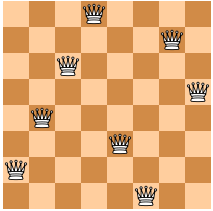

In [17]:
# We know each queen must be in a different row.
# So, we represent each queen by a single integer: the column position
Q = [ Int('Q_%i' % (i + 1)) for i in range(8) ]

# Each queen is in a column {1, ... 8 }
val_c = [ And(1 <= Q[i], Q[i] <= 8) for i in range(8) ]

# At most one queen per column
col_c = [ Distinct(Q) ]

# Diagonal constraint
diag_c = [ If(i == j,
              True,
              And(Q[i] - Q[j] != i - j, Q[i] - Q[j] != j - i))
           for i in range(8) for j in range(i) ]

solve(val_c + col_c + diag_c)


[Q_3 = 6,
 Q_1 = 5,
 Q_7 = 8,
 Q_8 = 3,
 Q_5 = 7,
 Q_4 = 1,
 Q_2 = 2,
 Q_6 = 4]


### Problem 2 (Soduko)

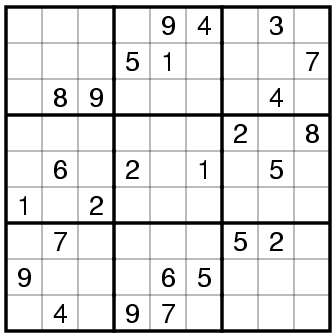

In [21]:
# 9x9 matrix of integer variables
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(9) ]
      for i in range(9) ]

# each cell contains a value in {1, ..., 9}
cells_c  = [ And(1 <= X[i][j], X[i][j] <= 9)
             for i in range(9) for j in range(9) ]

# each row contains a digit at most once
rows_c   = [ Distinct(X[i]) for i in range(9) ]

# each column contains a digit at most once
cols_c   = [ Distinct([ X[i][j] for i in range(9) ])
             for j in range(9) ]

# each 3x3 square contains a digit at most once
sq_c     = [ Distinct([ X[3*i0 + i][3*j0 + j]
                        for i in range(3) for j in range(3) ])
             for i0 in range(3) for j0 in range(3) ]

sudoku_c = cells_c + rows_c + cols_c + sq_c

# sudoku instance, we use '0' for empty cells
instance = ((0,0,0,0,9,4,0,3,0),
            (0,0,0,5,1,0,0,0,7),
            (0,8,9,0,0,0,0,4,0),
            (0,0,0,0,0,0,2,0,8),
            (0,6,0,2,0,1,0,5,0),
            (1,0,2,0,0,0,0,0,0),
            (0,7,0,0,0,0,5,2,0),
            (9,0,0,0,6,5,0,0,0),
            (0,4,0,9,7,0,0,0,0))

instance_c = [ If(instance[i][j] == 0,
                  True,
                  X[i][j] == instance[i][j])
               for i in range(9) for j in range(9) ]

s = Solver()
s.add(sudoku_c + instance_c)
if s.check() == sat:
    m = s.model()
    r = [ [ m.evaluate(X[i][j]) for j in range(9) ]
          for i in range(9) ]
    print_matrix(r)
else:
    print ("failed to solve")


[[7, 1, 5, 8, 9, 4, 6, 3, 2],
 [2, 3, 4, 5, 1, 6, 8, 9, 7],
 [6, 8, 9, 7, 2, 3, 1, 4, 5],
 [4, 9, 3, 6, 5, 7, 2, 1, 8],
 [8, 6, 7, 2, 3, 1, 9, 5, 4],
 [1, 5, 2, 4, 8, 9, 7, 6, 3],
 [3, 7, 6, 1, 4, 8, 5, 2, 9],
 [9, 2, 8, 3, 6, 5, 4, 7, 1],
 [5, 4, 1, 9, 7, 2, 3, 8, 6]]
